In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import seaborn as sns
sns.set()

In [4]:
from sklearn.cluster import DBSCAN
import pandas as pd

d1 = pd.read_excel('final1.xls')


In [5]:
d1.shape

(3142, 23)

In [7]:
d1.dtypes

State                                         object
County                                        object
2010 Census Population                        object
Population Estimate, 2014                     object
Food & Retail Tax 2014                       float64
Fast Food 2009                                 int64
Fast Food 2014                                 int64
Fast Food % Change 09-14                     float64
Full Service 2009                              int64
Full Service 2014                              int64
Full Service % Change 09-14                  float64
Grocery Store 09                               int64
Grocery Store 2014                             int64
Grocery Store % Change 09-14                 float64
Supercenters & Club Stores 2009                int64
Supercenters & Club Stores 2014                int64
Supercenters & Club Stores % Change 09-14    float64
Convenience Stores 2009                        int64
Convenience Stores 2014                       

In [41]:
d1_selected = d1[["Fast Food % Change 09-14", "Grocery Store % Change 09-14"]]


In [42]:
d1_selected[:10]

,Fast Food % Change 09-14,Grocery Store % Change 09-14
0,20.000000,-33.333333
1,17.857143,20.833333
2,4.761905,0.000000
3,-28.571429,-16.666667
4,-12.500000,0.000000
5,-25.000000,0.000000
6,0.000000,0.000000
7,8.421053,8.000000
8,18.181818,0.000000
9,-6.250000,25.000000


In [43]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit(d1_selected)
d1_transformed = stdscaler.transform(d1_selected)

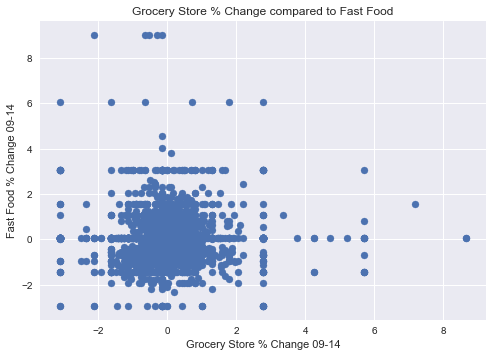

In [44]:
plt.scatter(d1_transformed[:,0], d1_transformed[:,1])
plt.xlabel("Grocery Store % Change 09-14")
plt.ylabel("Fast Food % Change 09-14")
plt.title("Grocery Store % Change compared to Fast Food")
plt.savefig("food3.png", format = "PNG")

In [45]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(d1_transformed)

In [46]:
labels = dbsc.labels_

core_samples = np.zeros_like(labels, dtype = bool)

In [47]:
unique_labels = np.unique(labels)
unique_labels

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [59]:
d1['cluster'] = labels
d1.sort_values('cluster')
d1.groupby('cluster').mean()

,Food & Retail Tax 2014,Fast Food 2009,Fast Food 2014,Fast Food % Change 09-14,Full Service 2009,Full Service 2014,Full Service % Change 09-14,Grocery Store 09,Grocery Store 2014,Grocery Store % Change 09-14,Supercenters & Club Stores 2009,Supercenters & Club Stores 2014,Supercenters & Club Stores % Change 09-14,Convenience Stores 2009,Convenience Stores 2014,Convenience Stores % Change 09-14,Specialized Food Stores 2009,Specialized Food Stores 2014,Specialized Food Stores % Change 09-14
cluster,,,,,,,,,,,,,,,,,,,
-1,1.441055,4.119266,5.201835,37.269257,7.486239,7.660550,7.264213,2.064220,2.339450,22.278287,0.110092,0.155963,2.875275,7.055046,6.853211,6.797585,0.504587,0.495413,-6.106338
0,1.055781,72.598477,78.752510,3.777421,76.087574,82.131533,4.135414,21.844583,22.626861,-4.421228,1.542402,1.825545,7.161315,41.189685,42.690897,2.552444,8.252336,7.788854,-5.345017
1,1.742568,1.405405,0.000000,-100.000000,3.486486,3.243243,1.653410,1.486486,1.540541,-0.105266,0.000000,0.000000,0.000000,2.594595,2.675676,7.051373,0.216216,0.135135,-9.611302
2,1.935795,1.863636,3.727273,100.000000,4.750000,4.522727,11.301082,2.250000,2.363636,2.607256,0.045455,0.045455,0.000000,4.863636,5.113636,7.610818,0.227273,0.136364,-7.954545
3,1.429688,1.812500,3.625000,100.000000,4.750000,5.000000,11.882440,3.187500,2.125000,-36.562500,0.125000,0.125000,0.000000,4.875000,4.562500,4.496528,0.375000,0.375000,-4.868938
4,1.800532,7.212766,7.851064,6.883203,9.340426,9.872340,14.973957,1.617021,3.234043,100.000000,0.212766,0.255319,1.206435,9.021277,8.446809,-5.544922,0.489362,0.382979,-16.200515


In [60]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

C:\Users\kdsing2\Anaconda3\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


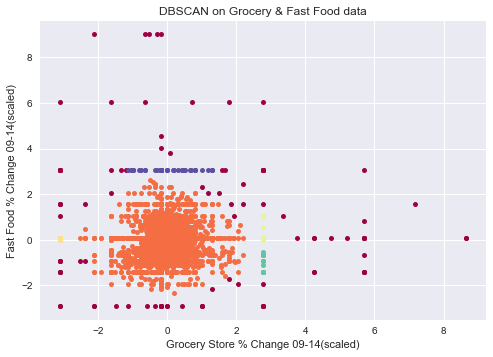

In [61]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = d1_transformed[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = d1_transformed[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)

plt.title("DBSCAN on Grocery & Fast Food data")
plt.xlabel("Grocery Store % Change 09-14(scaled)")
plt.ylabel("Fast Food % Change 09-14(scaled)")
plt.savefig("dbscan_food.png", format = "PNG")

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2).fit(d1_transformed)
labels_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_

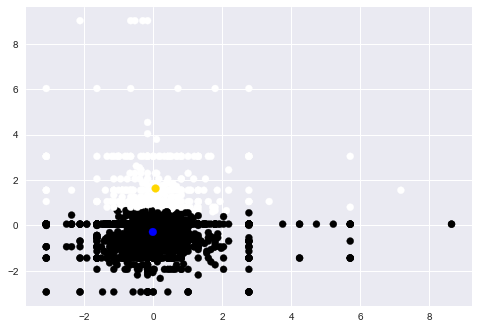

In [63]:
plt.scatter(d1_transformed[:,0], d1_transformed[:,1], c = labels_kmeans)
plt.scatter(centroids[:,0], centroids[:,1], c = ["gold","blue"], s = 60 )
plt.savefig("kmeans_food.png", format = "PNG")